# Notebook imoorts

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, fetch_openml, load_wine, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score, recall_score, 
                             f1_score, precision_score, balanced_accuracy_score, 
                             classification_report, precision_recall_curve, 
                             PrecisionRecallDisplay, roc_curve, RocCurveDisplay, 
                             mean_squared_error, mean_absolute_error, mean_absolute_percentage_error)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV

%matplotlib inline

# Confusion Matrix - Example

0.956140350877193


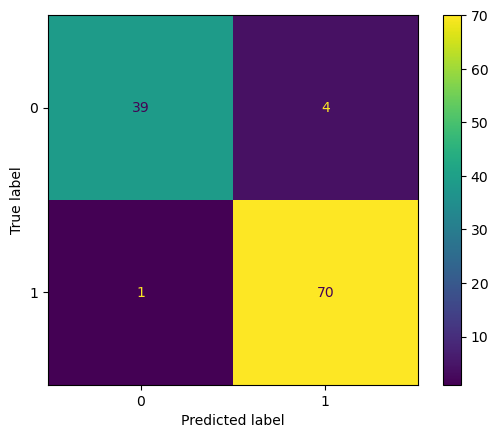

In [2]:
data, target = load_breast_cancer(return_X_y=True)
X_dev, X_test, y_dev, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=2000).fit(X_dev, y_dev)
pred_y = model.predict(X_test)
print(model.score(X_test, y_test))
cm = confusion_matrix(y_test, pred_y,)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [3]:
confusion_matrix(y_test, pred_y,)

array([[39,  4],
       [ 1, 70]], dtype=int64)

In [4]:
confusion_matrix(y_test, pred_y, normalize='true')

array([[0.90697674, 0.09302326],
       [0.01408451, 0.98591549]])

In [5]:
confusion_matrix(y_test, pred_y, normalize='pred')

array([[0.975     , 0.05405405],
       [0.025     , 0.94594595]])

# Classification Accuracy - Limitations

(11183, 6)
-1    10923
1       260
Name: class, dtype: int64
Accuracy: 0.9776
Recall: 0.0000
Precision: 0.0000
f1-score: 0.0000


C:\Users\s158025\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


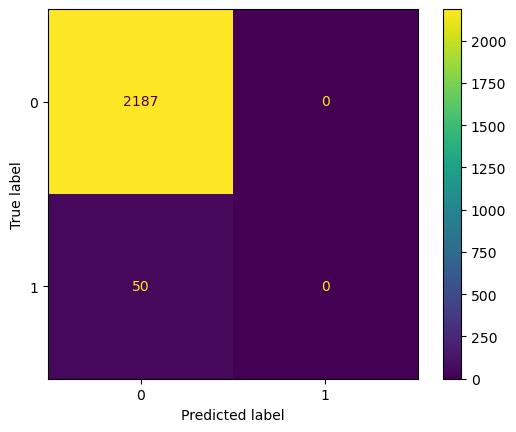

In [32]:
data = fetch_openml(name='mammography', as_frame=True, parser='auto')
X, y = data.data, data.target
print(X.shape)
print(y.value_counts())
X_dev, X_test, y_dev, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
rows=X_test.shape[0]

const_model_pred = ['-1'] * rows

print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=const_model_pred):0.4f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=const_model_pred, pos_label="1"):0.4f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=const_model_pred, pos_label="1"):0.4f}')
print(f'f1-score: {f1_score(y_true=y_test, y_pred=const_model_pred, pos_label="1"):0.4f}')

cm = confusion_matrix(y_test, const_model_pred,)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Accuracy: 0.9866
Recall: 0.4600
Precision: 0.8846
F1-score: 0.6053


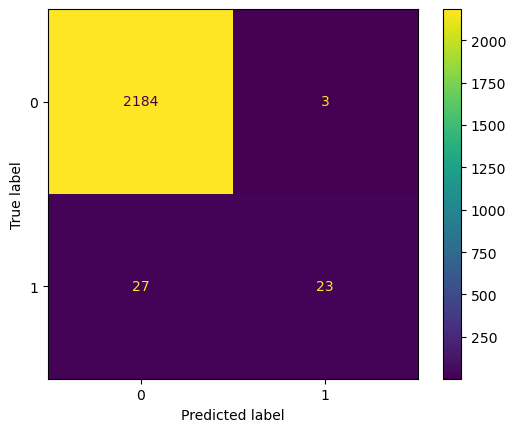

In [44]:
data = fetch_openml(name='mammography', as_frame=True, parser='auto')
X, y = data.data, data.target

X_dev, X_test, y_dev, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
rows=X_test.shape[0]

model = LogisticRegression().fit(X_dev, y_dev)
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred):0.4f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_pred, pos_label="1"):0.4f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=y_pred, pos_label="1"):0.4f}')
print(f'F1-score: {f1_score(y_true=y_test, y_pred=y_pred, pos_label="1"):0.4f}')

cm = confusion_matrix(y_test, y_pred,)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Averaging Metrics - Example

In [49]:
data = fetch_openml(name='mammography', as_frame=True, parser='auto')
X, y = data.data, data.target

X_dev, X_test, y_dev, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression().fit(X_dev, y_dev)
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(f'Binary Recall: {recall_score(y_true=y_test, y_pred=y_pred, pos_label="1", average="binary")}')
print(f'Macro Recall: {recall_score(y_true=y_test, y_pred=y_pred, pos_label="1", average="macro")}')
print(f'Weighted Recall: {recall_score(y_true=y_test, y_pred=y_pred, pos_label="1", average="weighted")}')

Accuracy: 0.9865891819400984
Binary Recall: 0.46
Macro Recall: 0.7293141289437586
Weighted Recall: 0.9865891819400984


C:\Users\s158025\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\s158025\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# Averaging Metrics - Balanced Accuracy

In [55]:
data = fetch_openml(name='mammography', as_frame=True, parser='auto')
X, y = data.data, data.target

X_dev, X_test, y_dev, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression().fit(X_dev, y_dev)
y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(f'Binary Recall: {recall_score(y_true=y_test, y_pred=y_pred, pos_label="1", average="binary")}')
print(f'Macro Recall: {recall_score(y_true=y_test, y_pred=y_pred, pos_label="1", average="macro")}')
print(f'Weighted Recall: {recall_score(y_true=y_test, y_pred=y_pred, pos_label="1", average="weighted")}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_true=y_test, y_pred=y_pred)}')

Accuracy: 0.9865891819400984
Binary Recall: 0.46
Macro Recall: 0.7293141289437586
Weighted Recall: 0.9865891819400984
Balanced Accuracy: 0.7293141289437586


C:\Users\s158025\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\s158025\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to '1') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# Averaging Metrics - Example

In [57]:
data = fetch_openml(name='mammography', as_frame=True, parser='auto')
X, y = data.data, data.target

X_dev, X_test, y_dev, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression().fit(X_dev, y_dev)
y_pred = model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      2187
           1       0.88      0.46      0.61        50

    accuracy                           0.99      2237
   macro avg       0.94      0.73      0.80      2237
weighted avg       0.99      0.99      0.98      2237



In [69]:
data = fetch_openml(name='mammography', as_frame=True, parser='auto')
X, y = data.data, data.target

X_dev, X_test, y_dev, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression().fit(X_dev, y_dev)
y_pred = model.predict_proba(X_test)[:,1] >=0.3
print(classification_report(y_true=y_test=='1', y_pred=y_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2187
        True       0.74      0.56      0.64        50

    accuracy                           0.99      2237
   macro avg       0.86      0.78      0.81      2237
weighted avg       0.98      0.99      0.98      2237



In [70]:
data = fetch_openml(name='mammography', as_frame=True, parser='auto')
X, y = data.data, data.target

X_dev, X_test, y_dev, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression().fit(X_dev, y_dev)
y_pred = model.predict_proba(X_test)[:,1] >=0.7
print(classification_report(y_true=y_test=='1', y_pred=y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      2187
        True       1.00      0.28      0.44        50

    accuracy                           0.98      2237
   macro avg       0.99      0.64      0.71      2237
weighted avg       0.98      0.98      0.98      2237



# PR Curve - Example

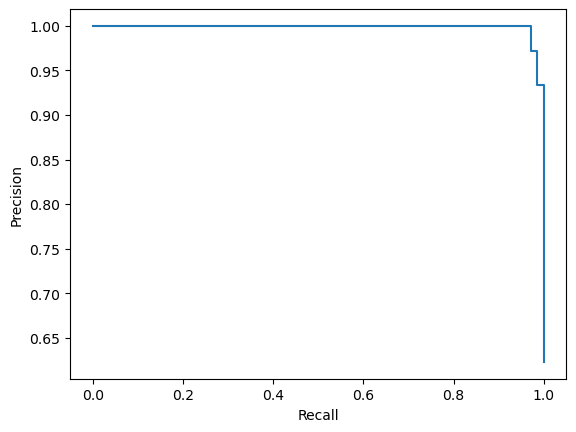

In [75]:
data, target = load_breast_cancer(return_X_y=True)
X_dev, X_test, y_dev, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000).fit(X_dev, y_dev)
y_pred_prob = model.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_true=y_test, probas_pred=y_pred_prob, 
                                                       pos_label=1)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [76]:
thresholds

array([8.19078884e-25, 1.08250020e-14, 3.89100662e-12, 6.19088784e-11,
       1.96402290e-10, 4.41053799e-10, 7.48245405e-10, 1.67274531e-09,
       2.88635845e-09, 6.37549278e-09, 7.45854168e-09, 2.06980964e-08,
       3.06141945e-08, 1.70201080e-07, 3.13769581e-07, 3.20149172e-07,
       7.36158579e-07, 7.88948617e-07, 9.21462704e-06, 1.01307484e-05,
       4.13749337e-05, 7.60863744e-05, 8.38456329e-05, 9.55057883e-05,
       4.03335319e-04, 5.42160259e-04, 5.77672217e-04, 6.19711038e-04,
       8.09734738e-04, 1.03121046e-03, 1.61169967e-03, 1.75395737e-03,
       1.96735099e-03, 2.07775864e-03, 9.42683097e-03, 1.26556063e-02,
       1.93851575e-02, 6.82008895e-02, 8.18518005e-02, 1.75284824e-01,
       5.32294379e-01, 5.61385856e-01, 7.19438639e-01, 7.25180670e-01,
       8.26890674e-01, 8.49982097e-01, 8.60970670e-01, 8.77511917e-01,
       8.78892745e-01, 8.96884830e-01, 9.00416151e-01, 9.19762577e-01,
       9.29444664e-01, 9.29717896e-01, 9.56594630e-01, 9.59782601e-01,
      

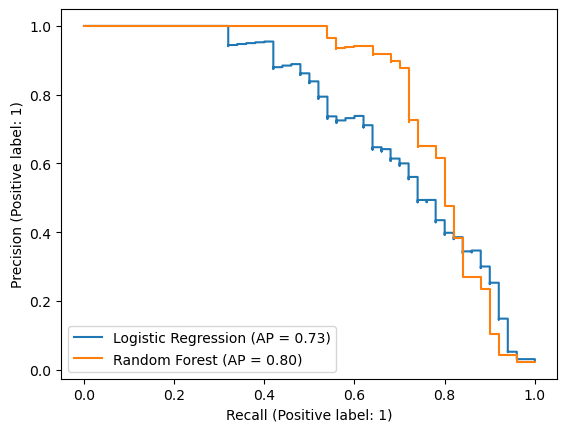

In [115]:
data = fetch_openml(name='mammography', as_frame=True, parser='auto')
X, y = data.data, data.target

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = LogisticRegression(max_iter=2000).fit(X_dev, y_dev)
y_pred_prob_1 = model_1.predict_proba(X_test)[:,1]

model_2 = RandomForestClassifier().fit(X_dev, y_dev)
y_pred_prob_2 = model_2.predict_proba(X_test)[:,1]

fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax, name="Logistic Regression", pos_label='1')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax, name='Random Forest', pos_label='1')
plt.show()

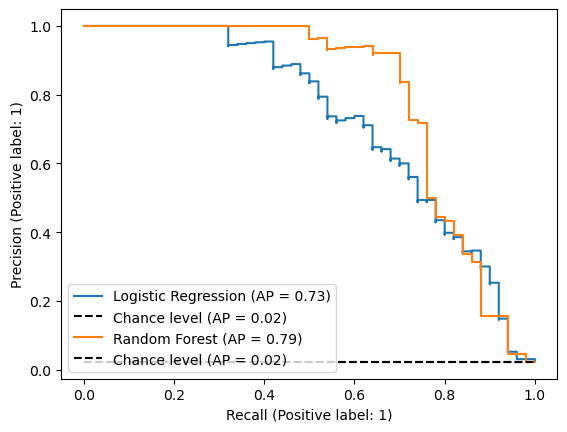

In [116]:
data = fetch_openml(name='mammography', as_frame=True, parser='auto')
X, y = data.data, data.target

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = LogisticRegression(max_iter=2000).fit(X_dev, y_dev)
y_pred_prob_1 = model_1.predict_proba(X_test)[:,1]

model_2 = RandomForestClassifier().fit(X_dev, y_dev)
y_pred_prob_2 = model_2.predict_proba(X_test)[:,1]

fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax, 
                                        name="Logistic Regression", pos_label='1',plot_chance_level=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax, 
                                        name='Random Forest', pos_label='1',plot_chance_level=True)
plt.show()

# Receiver Operating Curve (ROC) - Example

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


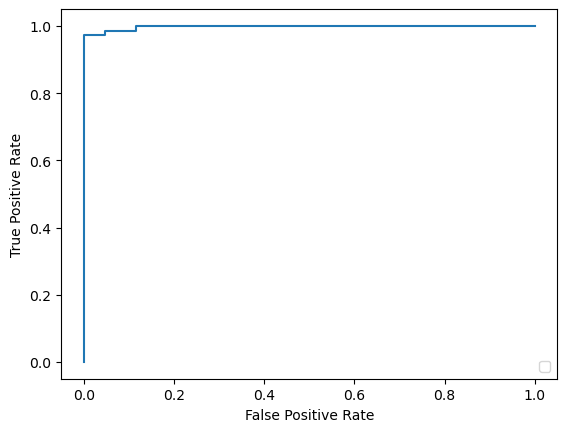

In [7]:
data, target = load_breast_cancer(return_X_y=True)
X_dev, X_test, y_dev, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000).fit(X_dev, y_dev)
y_pred_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds=roc_curve(y_true=y_test, y_score=y_pred_prob)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
disp.plot()

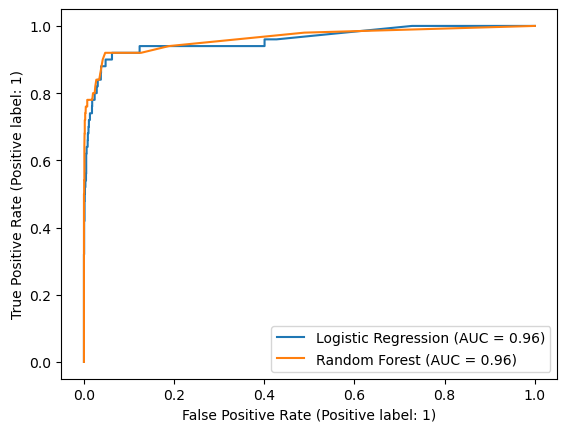

In [11]:
data = fetch_openml(name='mammography', as_frame=True, parser='auto')
X, y = data.data, data.target

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = LogisticRegression(max_iter=2000).fit(X_dev, y_dev)
y_pred_prob_1 = model_1.predict_proba(X_test)[:,1]

model_2 = RandomForestClassifier().fit(X_dev, y_dev)
y_pred_prob_2 = model_2.predict_proba(X_test)[:,1]

fig, ax = plt.subplots()
RocCurveDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax, name="Logistic Regression", pos_label='1')
RocCurveDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax, name="Random Forest", pos_label='1')
plt.show()

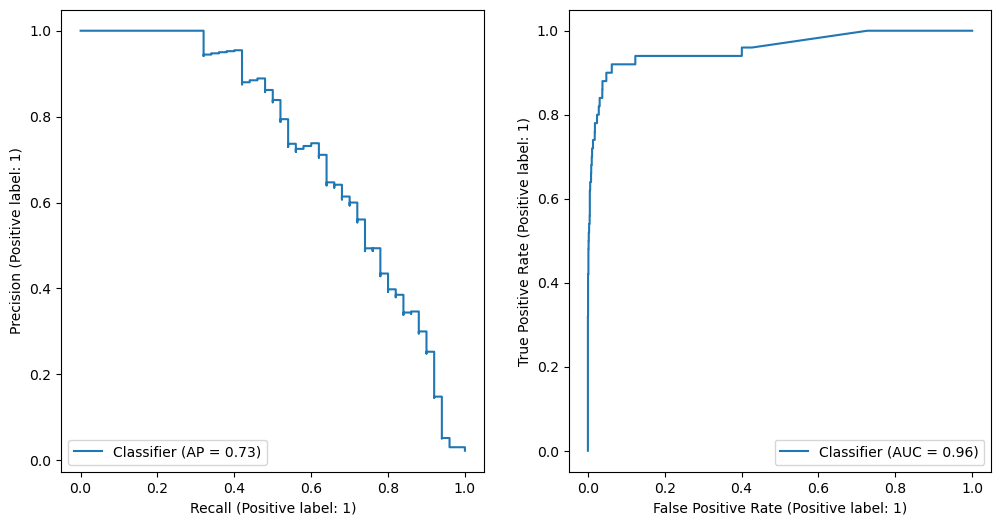

In [22]:
data = fetch_openml(name='mammography', as_frame=True, parser='auto')
X, y = data.data, data.target
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000).fit(X_dev, y_dev)
y_pred_prob = model.predict_proba(X_test)[:,1]

plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax1, pos_label='1')

ax2 = plt.subplot(122)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax2, pos_label='1')

plt.show()

# Evaluation Metrics for Regression - Example

In [32]:
data = load_wine()
X_dev, X_test, y_dev, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = Ridge().fit(X_dev, y_dev)
y_pred = model.predict(X_test)

print(f'R^2: {model.score(X_test, y_test)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')

R^2: 0.8832537321861239
MSE: 0.06810198955809438
MAE: 0.20246389302187376
MAPE: 365040749219761.2


# Training Calibrated Classifier - Example

In [46]:
X, y = make_classification(n_samples=10000, n_features=20, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_calib, y_train, y_calib = train_test_split(X_dev, y_dev, test_size=0.2, random_state=42)

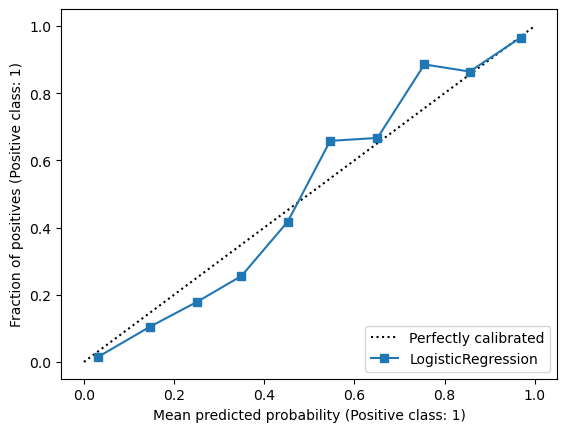

In [47]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
display = CalibrationDisplay.from_estimator(clf, X_test, y_test, n_bins=10, name='LogisticRegression')

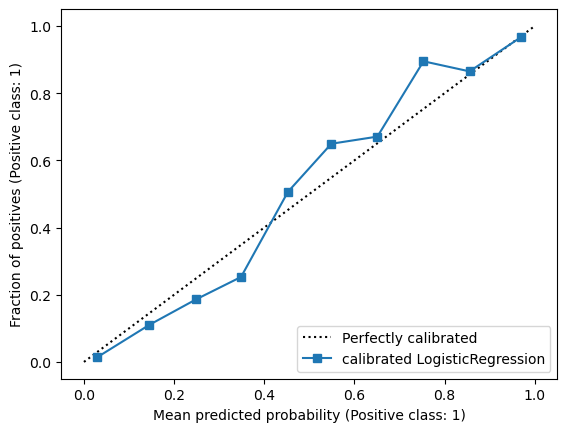

In [49]:
cal_clf = CalibratedClassifierCV(clf, cv='prefit', method='sigmoid')
cal_clf.fit(X_calib, y_calib)
display = CalibrationDisplay.from_estimator(cal_clf, X_test, y_test, n_bins=10, name='calibrated LogisticRegression')

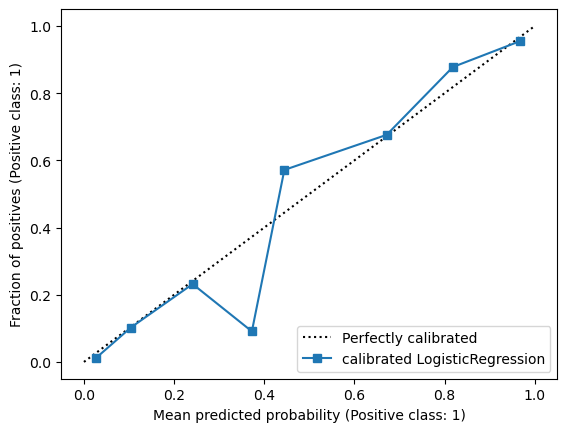

In [50]:
cal_clf = CalibratedClassifierCV(clf, cv='prefit', method='isotonic')
cal_clf.fit(X_calib, y_calib)
display = CalibrationDisplay.from_estimator(cal_clf, X_test, y_test, n_bins=10, name='calibrated LogisticRegression')